In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.cluster import KMeans

df = pd.read_csv(r"D:\code\data\1999年全国31个省份城镇居民家庭平均每人全年消费性支出数据.csv")
df

,城市,食品,衣着,家庭设备用品及服务,医疗保健,交通和通讯,娱乐教育文化服务,居住,杂项商品和服务
0,北京,2959.19,730.79,749.41,513.34,467.87,1141.82,478.42,457.64
1,天津,2459.77,495.47,697.33,302.87,284.19,735.97,570.84,305.08
2,河北,1495.63,515.90,362.37,285.32,272.95,540.58,364.91,188.63
3,山西,1406.33,477.77,290.15,208.57,201.50,414.72,281.84,212.10
4,内蒙古,1303.97,524.29,254.83,192.17,249.81,463.09,287.87,192.96
5,辽宁,1730.84,553.90,246.91,279.81,239.18,445.20,330.24,163.86
6,吉林,1561.86,492.42,200.49,218.36,220.69,459.62,360.48,147.76
7,黑龙江,1410.11,510.71,211.88,277.11,224.65,376.82,317.61,152.85
8,上海,3712.31,550.74,893.37,346.93,527.00,1034.98,720.33,462.03
9,江苏,2207.58,449.37,572.40,211.92,302.09,585.23,429.77,252.54


In [3]:
import numpy as np
from sklearn.cluster import KMeans


def loadData(filePath):
    # 打开文件流
    fr = open(filePath, 'r+', encoding='UTF-8')
    # 完整的读取，一次性读取整个文件，按行读取
    lines = fr.readlines()
    # 将读入的数据进行拆分，分为数据和城市名
    retData = []
    retCityName = []
    for line in lines:
        # 去除字符串首尾的空格或者回车，并使用“，”进行分割
        items = line.strip().split(",")
        # 每一行的开头是城市名臣
        retCityName.append(items[0])
        # 将数据组合成一个列表，并且强制转换类型为float浮点型
        retData.append([float(items[i]) for i in range(1, len(items))])
    return retData, retCityName


# 使用读取数据，获取城市名和相关的数据
data, cityName = loadData(r"D:\code\data\city.txt")
# 创建指定簇数量KMeans对象实例
km = KMeans(n_clusters=4)
# 加载数据，进行训练，获得标签，总共是四个簇，就是四个标签，将给31个数据，每个数据都打上0-3的标签
label = km.fit_predict(data)
# 计算出每一个簇形成的所有的行内的数据，计算出该簇内的数据的和
expenses = np.sum(km.cluster_centers_, axis=1)
# 总共是四个标签，四个集合，按照打上的标签将城市名进行分类


CityCluster = [[], [], [], []]
# 遍历所有的标签，并将对应的城市根据标签加上对应的簇中
for i in range(len(cityName)):
    CityCluster[label[i]].append(cityName[i])
# 遍历所有的簇中心的数量，总共就只有四个，进行打印输出
for i in range(len(CityCluster)):
    print("Expenses:%.2f" % expenses[i])
    print(CityCluster[i])

D:\systemEnvironment\Anaconda3\envs\dsLL\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\systemEnvironment\Anaconda3\envs\dsLL\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Expenses:4441.04
['安徽', '湖南', '湖北', '广西', '海南', '四川', '云南']
Expenses:5567.33
['天津', '江苏', '浙江', '福建', '重庆', '西藏']
Expenses:7754.66
['北京', '上海', '广东']
Expenses:3788.76
['河北', '山西', '内蒙古', '辽宁', '吉林', '黑龙江', '江西', '山东', '河南', '贵州', '陕西', '甘肃', '青海', '宁夏', '新疆']


Labels:
[ 0 -1  0  1 -1  1  0  1  2 -1  1  0  1  1  3 -1 -1  3 -1  1  1 -1  1  3
  4 -1  1  1  2  0  2  2 -1  0  1  0  0  0  1  3 -1  0  1  1  0  0  2 -1
  1  3  1 -1  3 -1  3  0  1  1  2  3  3 -1 -1 -1  0  1  2  1 -1  3  1  1
  2  3  0  1 -1  2  0  0  3  2  0  1 -1  1  3 -1  4  2 -1 -1  0 -1  3 -1
  0  2  1 -1 -1  2  1  1  2  0  2  1  1  3  3  0  1  2  0  1  0 -1  1  1
  3 -1  2  1  3  1  1  1  2 -1  5 -1  1  3 -1  0  1  0  0  1 -1 -1 -1  2
  2  0  1  1  3  0  0  0  1  4  4 -1 -1 -1 -1  4 -1  4  4 -1  4 -1  1  2
  2  3  0  1  0 -1  1  0  0  1 -1 -1  0  2  1  0  2 -1  1  1 -1 -1  0  1
  1 -1  3  1  1 -1  1  1  0  0 -1  0 -1  0  0  2 -1  1 -1  1  0 -1  2  1
  3  1  1 -1  1  0  0 -1  0  0  3  2  0  0  5 -1  3  2 -1  5  4  4  4 -1
  5  5 -1  4  0  4  4  4  5  4  4  5  5  0  5  4 -1  4  5  5  5  1  5  5
  0  5  4  4 -1  4  4  5  4  0  5  4 -1  0  5  5  5 -1  4  5  5  5  5  4
  4]
Noise raito: 22.15%
Estimated number of clusters: 6
Silhouette Coefficient: 0.710
Cluster  0 :
[22, 22, 22, 22,

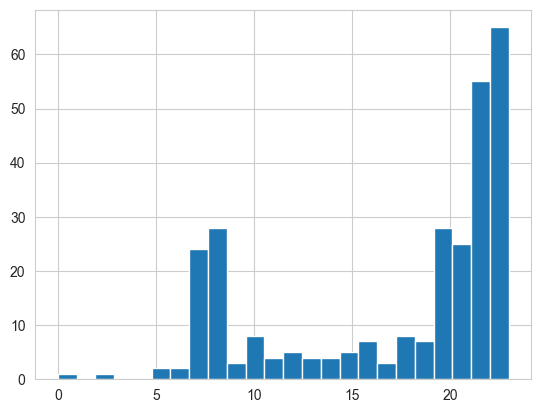

In [7]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt

mac2id = dict()
onlinetimes = []
f = open(r"D:\code\data\学生月上网时间分布-TestData.txt", encoding='utf-8')
for line in f:
    #读取每条数据中的mac地址，开始上网时间，上网时长
    mac = line.split(',')[2]
    onlinetime = int(line.split(',')[6])
    starttime = int(line.split(',')[4].split(' ')[1].split(':')[0])

    #mac2id是一个字典：key是mac地址，value是对应mac地址的上网时长以及开始上网时间
    if mac not in mac2id:
        mac2id[mac] = len(onlinetimes)
        onlinetimes.append((starttime, onlinetime))
    else:
        onlinetimes[mac2id[mac]] = [(starttime, onlinetime)]
real_X = np.array(onlinetimes).reshape((-1, 2))

#调用DBSCAN方法训练，labels为每个数据的簇标签
X = real_X[:, 0:1]
db = DBSCAN(eps=0.01, min_samples=20).fit(X)
labels = db.labels_

#打印数据被记上的标签，计算标签为-1,即噪声数据的比例
print('Labels:')
print(labels)
raito = len(labels[labels[:] == -1]) / len(labels)
print('Noise raito:', format(raito, '.2%'))

#计算簇的个数并打印，评价聚类效果
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

#打印各簇标号以及各簇内数据
for i in range(n_clusters_):
    print('Cluster ', i, ':')
    print(list(X[labels == i].flatten()))

plt.hist(X, 24)
plt.show()

In [9]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

mac2id = dict()
"""
key是MAC地址
value是开始上网时间和上网时长
"""
onlinetimes = []
f = open(r"D:\code\data\学生月上网时间分布-TestData.txt", encoding='utf8')
for line in f:
    data = line.split(',')
    mac = data[2]  #读取Mac地址
    onlinetime = int(data[6])  #读取上网时间
    starttime = int(data[4].split(' ')[1].split(':')[0])  #读取开始时间（我们只要年月日时分秒里的“时”）

    mac2id[mac] = len(onlinetimes)  #len(onlinetimes)就是此时对应的onlinetimes里面的元素个数，mac2id的内容见下面
    onlinetimes.append((starttime, onlinetime))  #onlinetimes里面的内容见下面

#onlinetimes里面的内容是[(22, 1558), (12, 40261), (22, 1721), (23, 351), (16, 23564),,,]
#mac2id这个字典里面是{'A417314EEA7B': 0, 'F0DEF1C78366': 1, '88539523E88D': 2,,,,'3CDFBD175878': 287, '002427FE3712': 288}

#-----------------------------------------以下内容进行了改动-------------------------------------------------------------

real_X = np.array(onlinetimes).reshape((-1, 2))  #参数-1可以自动确定行数

X = real_X[:, 1:]  # 截取第二列（也就是“上网的总时长”）我们这次根据上网的总时长进行蔟类

X = np.log(1 + real_X[:, 1:])  #上网的总时长太大了，都是几千，我们要进行对数化处理

db = DBSCAN(eps=0.14, min_samples=10).fit(X)  #调用Dbscan的的方法进行训练
# eps:两个样本被看作邻居节点的最大距离
# min_sample:簇的样本数
# metrics:距离计算方式（默认欧几里得距离）

labels = db.labels_
print("Labels")
print(labels)
ratio = len(labels[labels[:] == -1]) / len(labels[:])  # 判定噪声数据（label被打上-1）数据所占的比例
print("Noise ratio:{:.2f}".format(ratio))  #输出噪声数据所占的比例
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Estimate number of clusters:%d" % n_clusters_)  #输出蔟的个数
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))  #输出蔟类效果评价指标（轮廓系数）
#轮廓系数（Silhouette Coefficient）的值是介于 [-1,1] ，越趋近于1代表内聚度和分离度都相对较优

for i in range(n_clusters_):
    print("Cluster", i, ":")
    count = len(X[labels == i])
    mean = np.mean(real_X[labels == i][:, 1])
    std = np.std(real_X[labels == i][:, 1])
    print('\t number of sample:', count)
    print('\t mean of sample:', format(mean, '.1f'))
    print('\t std of sample:', format(std, '.1f'))



Labels
[ 0  1  0  4  1  2  0  2  0  3 -1  0 -1 -1  0  3  1  0  3  2  2  1  2  0
  1  1 -1 -1  0  0  0  0  1  0 -1  0  0  0  2  0  1  0 -1 -1  0  0  0  3
  2  0 -1  1  0  1  0  0 -1  2  0  0  0  1  3  3  0  2  0 -1  3  0  0  2
  0  0  0  2  1 -1  0  0  0  0  0  0  1 -1  0  3  1  0  1  1  0  1  0  1
  0  0 -1  1  1  0  0  2  0  0  0  2  2  0  0  0 -1  0  0  4  0  1  2 -1
  0  1  0  2  0 -1 -1 -1  0  1  1  3 -1  0  1  0  2  0  0  2  1  1  0  0
  0  0  4 -1  0  0  0  0  2  0  0  0  0 -1  2  0  0  0  0  4  0  0 -1  0
  2  0  0 -1  0  1  4  0  0 -1  1  1  0  0  2  0  0  3 -1 -1 -1  1  0  0
  2  1  0 -1 -1  3  2  2  0  0  3  0  1  0  0  0  3  2  0 -1  0  1 -1 -1
  0  2  2  1  4  0  0  1  0  2  0  0  0  0  1  1  0  0  1  0  4 -1 -1  0
  0  0 -1 -1  1 -1  4 -1  0  2  2 -1  2  1  2 -1  0 -1  0  2  2  1 -1  0
  1  2 -1 -1  1 -1  2 -1 -1  1  4  2  3  1  0  4  0  0  4  2  4  0  0  2
 -1]
Noise ratio:0.17
Estimate number of clusters:5
Silhouette Coefficient: 0.227
Cluster 0 :
	 number of sample: 128